<a href="https://colab.research.google.com/github/hughjafro/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/CTolbert_DS_Unit_2_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

In [0]:
# Import all packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# For scaling
from sklearn.preprocessing import scale, StandardScaler

# Linear Regression models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Logistic Regression
from sklearn.linear_model import LogisticRegression


# For ridge regression
from sklearn.linear_model import Ridge

In [114]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation',
              'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hrsperweek', 'country', 'income']

df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df_raw.columns =['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation',
             'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hrsperweek', 'country', 'income']

print('Shape; ', df_raw.shape)
df_raw.head()

Shape;  (32561, 15)


,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hrsperweek,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [115]:
df_raw.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hrsperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [116]:
df_raw.isna().sum()

age              0
workclass        0
fnlwgt           0
education        0
educationnum     0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hrsperweek       0
country          0
income           0
dtype: int64

In [117]:
df_raw.dtypes

age               int64
workclass        object
fnlwgt            int64
education        object
educationnum      int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hrsperweek        int64
country          object
income           object
dtype: object

####Label Encoding

In [0]:
#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [119]:
dummyEncode(df_raw)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hrsperweek,country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
6,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
7,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
8,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
9,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1


In [120]:
# Check target count
print(df_raw.shape, '\n')
df_raw['income'].value_counts()

(32561, 15) 



0    24720
1     7841
Name: income, dtype: int64

## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [123]:
from sklearn.metrics import accuracy_score

X = df_raw.drop('income', axis=1)
y = df_raw['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr1 = LogisticRegression(solver='lbfgs', max_iter=1000, verbose=1).fit(X_train,y_train)
y_pred = lr1.predict(X_test)

print('Training score: ', lr1.score(X_train,y_train))
print('Test score: ', lr1.score(X_test,y_test))
print('Predicted value: ', y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred))
#print(lr1.n_iter_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Training score:  0.7856674856674857
Test score:  0.7926544650534333
Predicted value:  [0 0 0 ... 0 0 0]
Accuracy:  0.7926544650534333


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [124]:
lr1.predict_proba(X_test)[1]

array([0.76572368, 0.23427632])

In [125]:
lr1.predict_proba(X_test)[0]

array([0.84284331, 0.15715669])

In [126]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y, test_size=0.5, random_state=42)

print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16280, 14) (16281, 14) (16280,) (16281,)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [127]:
lr1.coef_

array([[ 1.66459451e-02, -4.65150111e-03, -2.16777598e-06,
        -9.46536338e-03,  3.38254071e-03, -1.19159155e-02,
        -2.66228375e-03, -1.24838105e-02, -4.35436282e-03,
         1.56481131e-03,  3.30424086e-04,  7.54572005e-04,
         9.60401580e-03, -5.09168520e-02]])

In [128]:
lr1.intercept_

array([-0.00161902])

In [0]:
def sigmoid(x):
  return 1 / (1 + np.e**(-x))

In [130]:
sigmoid(lr1.intercept_ + np.dot(lr1.coef_, np.transpose(X_test)))

array([[0.49474265, 0.48814921, 0.50422392, ..., 0.49371626, 0.48336884,
        0.50261699]])

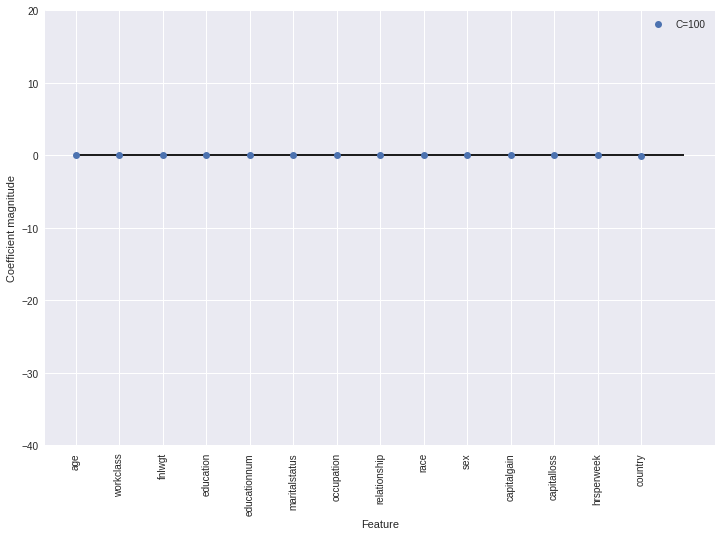

In [131]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))

plt.plot(lr1.coef_.T, 'o', label="C=100")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.hlines(0, 0, X.shape[1])
plt.ylim(-40, 20)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend();

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?
2. What are 3 features negatively correlated with income above 50k?
3. Overall, how well does the model explain the data and what insights do you derive from it?

*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.
2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.
3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis

**TODO - your answers!**